In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import openmc
%matplotlib inline
import openmc.deplete
openmc.config['cross_sections']='/home/nushaer/Desktop/meh/endfb-viii.0-hdf5/cross_sections.xml'
openmc.config['chain_file']='/home/nushaer/Desktop/meh/endfb-viii.0-hdf5/chain_casl_sfr.xml'
import math

In [2]:
fuel_temp = 900
coolant1_temp = 900
coolant2_temp = 600 #250K 294K 300 600 900 1200 2500

In [3]:
tmox = openmc.Material(material_id=1, name='Mixed oxide')
tmox.add_nuclide('U235', 0.0018, 'wo')
tmox.add_nuclide('U238', 0.4728, 'wo')
tmox.add_nuclide('Th232', 0.23, 'wo')
tmox.add_nuclide('Pu238', 0.0053, 'wo')
tmox.add_nuclide('Pu239', 0.1, 'wo')
tmox.add_nuclide('Pu240', 0.0445, 'wo')
tmox.add_nuclide('Pu241', 0.0124, 'wo')
tmox.add_nuclide('Pu242', 0.0156, 'wo')
tmox.add_nuclide('O16', 0.1176, 'wo')
tmox.set_density('g/cc',10.0)
tmox.temperature = fuel_temp

seed_fuel = openmc.Material(material_id=2, name='Seed or breeder')
seed_fuel.add_element('U', 1.0, enrichment= 0.3)
seed_fuel.add_element('O', 2.0)
seed_fuel.set_density('g/cc',10.0)
seed_fuel.temperature = fuel_temp

uranium_50 = openmc.Material(material_id=3, name='Enrichment 5.0')
uranium_50.add_nuclide('U238', 0.95)
uranium_50.add_nuclide('U235', 0.05)
uranium_50.add_element('O', 2.0)
uranium_50.set_density('g/cc', 10.4)
uranium_50.temperature = fuel_temp

uranium_60 = openmc.Material(material_id=4, name='Enrichment 6.0')
uranium_60.add_nuclide('U238', 0.94)
uranium_60.add_nuclide('U235', 0.06)
uranium_60.add_element('O', 2.0)
uranium_60.set_density('g/cc', 10.4)
uranium_60.temperature = fuel_temp

uranium_70 = openmc.Material(material_id=5, name='Enrichment 7.0')
uranium_70.add_nuclide('U238', 0.90)
uranium_70.add_nuclide('U235', 0.1)
uranium_70.add_nuclide('O16', 2.0)
uranium_70.set_density('g/cc', 10.4)
uranium_70.temperature = fuel_temp


minor_actinides = openmc.Material(material_id=6, name='minor actinides')
minor_actinides.add_nuclide('Np237',0.5620,'wo')
minor_actinides.add_nuclide('Am241',0.2640,'wo')
minor_actinides.add_nuclide('Am243',0.1200,'wo')
minor_actinides.add_nuclide('Cm243',0.0003,'wo')
minor_actinides.add_nuclide('Cm244',0.0511,'wo')
minor_actinides.add_nuclide('Cm245',0.0026,'wo')
minor_actinides.set_density('g/cc', 16.692)
minor_actinides.temperature = fuel_temp

cladding_material = openmc.Material(material_id=7, name="stainless steel 316L")
cladding_material.add_element('Fe',0.66,'wo')
cladding_material.add_element('Cr', 0.17,'wo')
cladding_material.add_element('Ni', 0.12,'wo')
cladding_material.add_element('Mo',0.02,'wo')
cladding_material.add_element('Mn',0.02,'wo')
cladding_material.add_element('Si',0.01,'wo')
cladding_material.set_density('g/cm3',8.0)
cladding_material.temperature = fuel_temp
cladding_material.depletable = False

control_material = openmc.Material(material_id=8, name='boron carbide')
control_material.add_nuclide('B10', 2.6)
control_material.add_nuclide('B11', 1.4)
control_material.add_nuclide('C12', 1.0)
control_material.set_density('g/cm3', 2.52)
control_material.temperature = fuel_temp
control_material.depletable = False

coolant1 = openmc.Material(material_id=9, name='inner Coolant')
coolant1.add_element('H',2.0)
coolant1.add_element('O',1.0)
coolant1.set_density('g/cm3',0.1)
coolant1.temperature = coolant1_temp
coolant1.depletable = False

coolant2 = openmc.Material(material_id=10, name='inner Coolant')
coolant2.add_element('H',2.0)
coolant2.add_element('O',1.0)
coolant2.set_density('g/cm3',0.836)
coolant2.temperature = coolant2_temp
coolant2.depletable = False

seed_with_MA = openmc.Material.mix_materials([seed_fuel,minor_actinides],[0.97,0.03],'wo')
seed_with_MA.temperature = fuel_temp
#seed_with_MA.id = 11

tmox_with_MA = openmc.Material.mix_materials([tmox,minor_actinides],[0.97,0.03],'wo')
tmox_with_MA.temperature = fuel_temp
#tmox_with_MA.id = 12

uranium_70_with_MA = openmc.Material.mix_materials([uranium_70 ,minor_actinides],[0.97,0.03],'wo')
uranium_70_with_MA.temperature = fuel_temp
#uranium_70_with_MA.id = 13

uranium_60_with_MA = openmc.Material.mix_materials([uranium_60 ,minor_actinides],[0.97,0.03],'wo')
uranium_60_with_MA.temperature = fuel_temp
#uranium_60_with_MA.id = 14

uranium_50_with_MA = openmc.Material.mix_materials([uranium_50 ,minor_actinides],[0.97,0.03],'wo')
uranium_50_with_MA.temperature = fuel_temp
#uranium_50_with_MA.id = 15

dep_U = openmc.Material(material_id=16, name='depleted uranium')
dep_U.add_element('U', 1.0, enrichment=0.3)
dep_U.add_element('O', 2.0)
dep_U.set_density('g/cc',10.0)
dep_U.temperature = fuel_temp

MA_fuel = openmc.Material.mix_materials([seed_fuel ,minor_actinides],[0.97,0.03],'wo')
MA_fuel.temperature = fuel_temp
#MA_fuel.id = 17

burna = openmc.Material(material_id=18, name='Burnable absorber')
burna.add_element('Gd',2.0)
burna.add_element('O',3.0)
burna.set_density('g/cc',7.41)

uranium_60_BA = openmc.Material.mix_materials([burna ,uranium_60],[0.03,0.97],'wo')
uranium_60_BA.temperature = fuel_temp
#MA_fuel.id = 19

uranium_70_BA = openmc.Material.mix_materials([burna ,uranium_70],[0.03,0.97],'wo')
uranium_70_BA.temperature = fuel_temp
#MA_fuel.id = 20

uranium_50_BA = openmc.Material.mix_materials([burna ,uranium_50],[0.03,0.97],'wo')
uranium_50_BA.temperature = fuel_temp
#MA_fuel.id = 21




In [4]:
materials = openmc.Materials([tmox,seed_fuel,uranium_50,uranium_60,uranium_70,
                              cladding_material,control_material,coolant1,coolant2,
                              seed_with_MA,tmox_with_MA,
                              uranium_70_with_MA,uranium_60_with_MA,uranium_50_with_MA,
                              MA_fuel, 
                              uranium_60_BA,uranium_50_BA,uranium_70_BA])
materials.export_to_xml()

mat_colors = {tmox:'brown',seed_fuel:'green',uranium_50:'cyan',uranium_60:'blue',
              uranium_70:'purple',seed_with_MA:'yellow',cladding_material:'black',
              control_material:'red',coolant1:'aqua',coolant2:'lightblue',
              tmox_with_MA:'orange',}

In [5]:
#filling empty space
mod_cell = openmc.Cell(fill=coolant2)
mod_u = openmc.Universe(cells=(mod_cell,))

coolant_cell = openmc.Cell(fill=coolant1)
coolant_u = openmc.Universe(cells=(coolant_cell,))

In [6]:
core_bottom = openmc.ZPlane(surface_id = 100, z0=-225, boundary_type = 'vacuum') #core height bottom
core_top= openmc.ZPlane(surface_id = 101, z0=225, boundary_type = 'vacuum') #core height top

<Axes: xlabel='x [cm]', ylabel='y [cm]'>

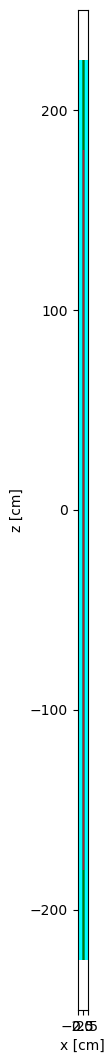

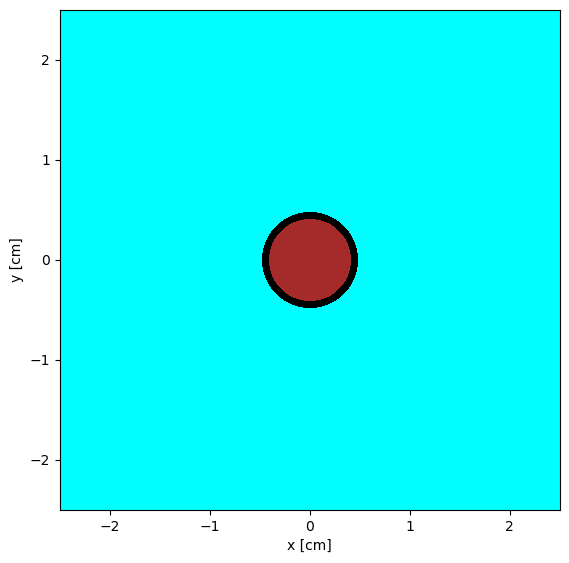

In [7]:
##inner fuel rod

fuel_ir1 = openmc.ZCylinder(surface_id = 200, r=0.41)
fuel_or1 = openmc.ZCylinder(surface_id = 201, r=0.48)

layers = [-225,-180,-140,-100,-60,-20,20,60,100,140,180,225]

layer_surfaces = [openmc.ZPlane(z0=z) for z in layers]

seed_region = [(-fuel_ir1 & +layer_surfaces[0] & -layer_surfaces[1]),
               (-fuel_ir1 & +layer_surfaces[2] & -layer_surfaces[3]),
               (-fuel_ir1 & +layer_surfaces[4] & -layer_surfaces[5]),
               (-fuel_ir1 & +layer_surfaces[6] & -layer_surfaces[7]),
               (-fuel_ir1 & +layer_surfaces[8] & -layer_surfaces[9]),
               (-fuel_ir1 & +layer_surfaces[10] & -layer_surfaces[11])]

fuel_region = [(-fuel_ir1 & +layer_surfaces[1] & -layer_surfaces[2]),
               (-fuel_ir1 & +layer_surfaces[3] & -layer_surfaces[4]),
               (-fuel_ir1 & +layer_surfaces[5] & -layer_surfaces[6]),
               (-fuel_ir1 & +layer_surfaces[7] & -layer_surfaces[8]),
               (-fuel_ir1 & +layer_surfaces[9] & -layer_surfaces[10])]

clad_region = +fuel_ir1 & -fuel_or1 & +core_bottom & -core_top

coolant_region = +fuel_or1 & +core_bottom & -core_top

fuel_cell1 = [openmc.Cell()]
for i in [0,1,2,3,4]:
    fuel_cell1.insert(i,openmc.Cell( fill=tmox, region=fuel_region[i]))

seed_cell1 = [openmc.Cell()]
seed_cell1.insert(0,openmc.Cell( fill=seed_fuel, region=seed_region[0]))
for i in [1,2,3,4]:
    seed_cell1.insert(i,openmc.Cell( fill=tmox, region=seed_region[i]))
seed_cell1.insert(5,openmc.Cell( fill=seed_fuel, region=seed_region[5]))


clad_cell1 = openmc.Cell(cell_id=101, fill=cladding_material, region=clad_region)

coolant_cell1 = openmc.Cell(cell_id=102, fill=coolant1, region=coolant_region)

fast_fuel_rod= openmc.Universe(cells=[fuel_cell1[0],fuel_cell1[1],fuel_cell1[2],
                                      fuel_cell1[3],fuel_cell1[4], 
                                      seed_cell1[0],seed_cell1[1],seed_cell1[2],
                                      seed_cell1[3],seed_cell1[4],seed_cell1[5],
                                      clad_cell1,coolant_cell1,])

fast_fuel_rod.plot(origin = (0,0,0), pixels=(50, 1000), width = (5.,500),
                   color_by = 'material',colors=mat_colors, basis='xz')
fast_fuel_rod.plot(origin = (0,0,0), pixels=(500, 500), width = (5,5), 
                   color_by = 'material',colors=mat_colors, basis='xy')

<Axes: xlabel='x [cm]', ylabel='y [cm]'>

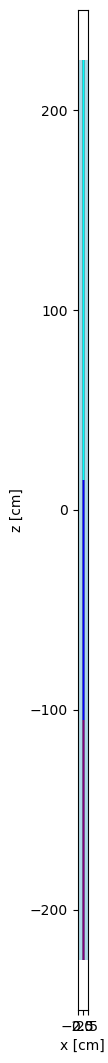

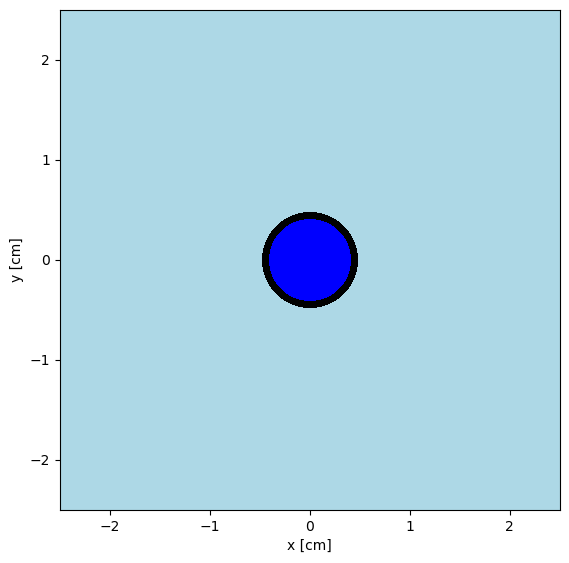

In [8]:
##outer fuel rod


U_layers = [-225,-105,15,225]

U_layer_surfaces = [openmc.ZPlane(z0=z) for z in U_layers]

t_fuel_region = [(-fuel_ir1 & +U_layer_surfaces[0] & -U_layer_surfaces[1]),
               (-fuel_ir1 & +U_layer_surfaces[1] & -U_layer_surfaces[2]),
               (-fuel_ir1 & +U_layer_surfaces[2] & -U_layer_surfaces[3])]

fuel_cell2 = [openmc.Cell()]

fuel_cell2.insert(0,openmc.Cell( fill=uranium_70, region=t_fuel_region[0]))
fuel_cell2.insert(1,openmc.Cell( fill=uranium_60, region=t_fuel_region[1]))
fuel_cell2.insert(2,openmc.Cell( fill=uranium_50, region=t_fuel_region[2]))

clad_cell2 = openmc.Cell(cell_id=201, fill=cladding_material, region=clad_region)

coolant_cell2 = openmc.Cell(cell_id=202, fill=coolant2, region=coolant_region)

thermal_fuel_rod= openmc.Universe(cells=[fuel_cell2[0],fuel_cell2[1],fuel_cell2[2],
                                        coolant_cell2,clad_cell2])

thermal_fuel_rod.plot(origin = (0,0,0), pixels=(50, 1000), width = (5.,500),
                   color_by = 'material',colors=mat_colors, basis='xz')
thermal_fuel_rod.plot(origin = (0,0,0), pixels=(500, 500), width = (5,5), 
                   color_by = 'material',colors=mat_colors, basis='xy')

<Axes: xlabel='x [cm]', ylabel='y [cm]'>

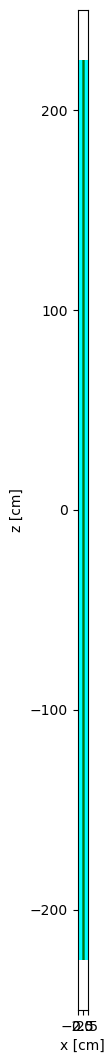

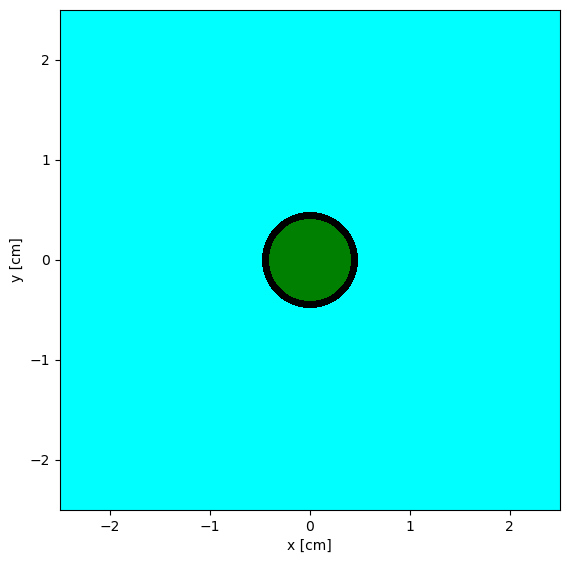

In [9]:
##Minor Actinides fuel rod


MA_U_layers = [-225,-105,15,225]

MA_U_layer_surfaces = [openmc.ZPlane(z0=z) for z in U_layers]

MA_fuel_region = [(-fuel_ir1 & +MA_U_layer_surfaces[0] & -MA_U_layer_surfaces[1]),
               (-fuel_ir1 & +MA_U_layer_surfaces[1] & -MA_U_layer_surfaces[2]),
               (-fuel_ir1 & +MA_U_layer_surfaces[2] & -MA_U_layer_surfaces[3])]

fuel_cell3 = [openmc.Cell()]

fuel_cell3.insert(0,openmc.Cell( fill=seed_fuel, region=MA_fuel_region[0]))
fuel_cell3.insert(1,openmc.Cell( fill=seed_fuel, region=MA_fuel_region[1]))
fuel_cell3.insert(2,openmc.Cell( fill=seed_fuel, region=MA_fuel_region[2]))

clad_cell3 = openmc.Cell(cell_id=2001, fill=cladding_material, region=clad_region)

coolant_cell3 = openmc.Cell(cell_id=2002, fill=coolant1, region=coolant_region)

MA_fuel_rod= openmc.Universe(cells=[fuel_cell3[0],fuel_cell3[1],fuel_cell3[2],
                                        coolant_cell3,clad_cell3])

MA_fuel_rod.plot(origin = (0,0,0), pixels=(50, 1000), width = (5.,500),
                   color_by = 'material',colors=mat_colors, basis='xz')
MA_fuel_rod.plot(origin = (0,0,0), pixels=(500, 500), width = (5,5), 
                   color_by = 'material',colors=mat_colors, basis='xy')

<Axes: xlabel='x [cm]', ylabel='y [cm]'>

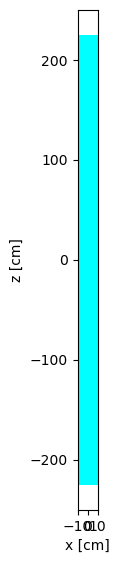

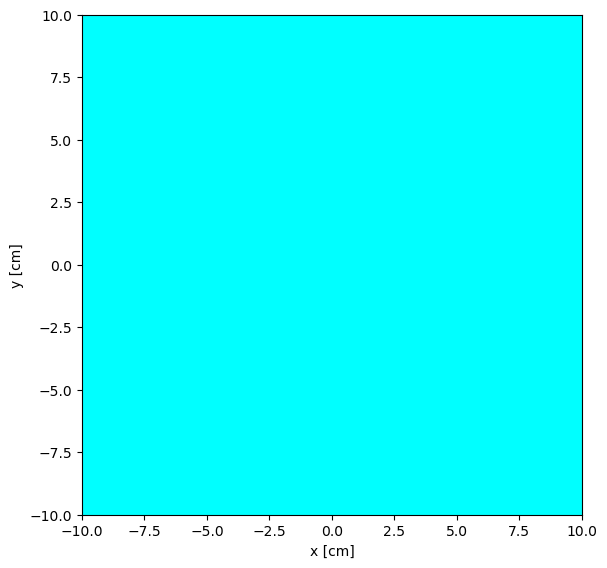

In [10]:
#fast region control rod
control_rod_radius = openmc.ZCylinder(r=1.85)
control_rod_clad_radius = openmc.ZCylinder(r=1.95)
control_rod_bottom = openmc.ZPlane(z0 =225)

control_rod_region = -control_rod_radius & -core_top & +control_rod_bottom 
control_rod_clad_region = -control_rod_clad_radius & +control_rod_radius & -core_top & +control_rod_bottom 
control_rod_bottom_region = -control_rod_clad_radius & -control_rod_bottom & +core_bottom
control_rod_coolant_region = +control_rod_clad_radius & -core_top & +core_bottom 

cr_cell = openmc.Cell(cell_id=300, fill=control_material, region=control_rod_region)
cr_clad_cell = openmc.Cell(cell_id=301, fill=cladding_material, region=control_rod_clad_region)
cr_coolant_cell = openmc.Cell(cell_id=302, fill=coolant1, region=control_rod_coolant_region)
cr_bottom_cell = openmc.Cell(cell_id=303, fill=coolant1, region=control_rod_bottom_region)

control_rod = openmc.Universe(cells=[cr_cell,cr_clad_cell,cr_coolant_cell,cr_bottom_cell])

control_rod.plot(origin = (0,0,0), pixels=(500, 500), width = (20,500), 
                 color_by = 'material',colors=mat_colors, basis='xz')
control_rod.plot(origin = (0,0,0), pixels=(500, 500), width = (20,20), 
                 color_by = 'material',colors=mat_colors, basis='xy')

<Axes: xlabel='x [cm]', ylabel='y [cm]'>

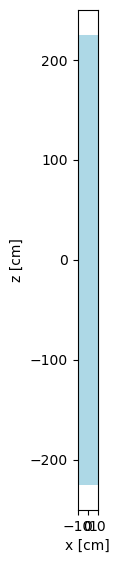

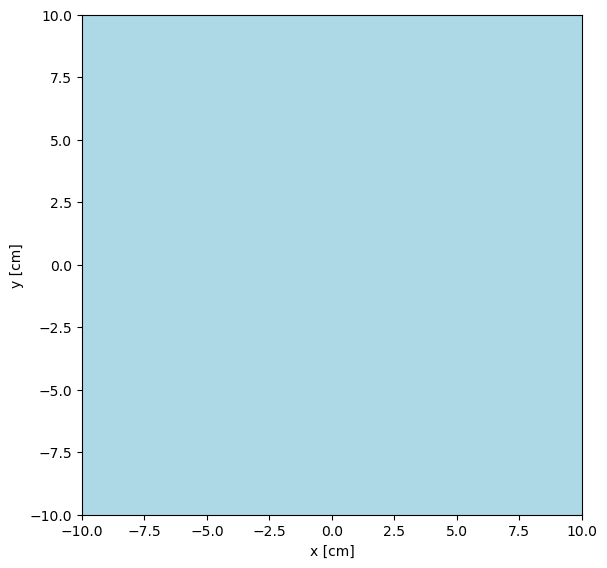

In [11]:
#thermal region control rod

t_cr_cell = openmc.Cell(cell_id=500, fill=control_material, region=control_rod_region)
t_cr_clad_cell = openmc.Cell(cell_id=501, fill=cladding_material, region=control_rod_clad_region)
t_cr_coolant_cell = openmc.Cell(cell_id=502, fill=coolant2, region=control_rod_coolant_region)
t_cr_bottom_cell = openmc.Cell(cell_id=503, fill=coolant2, region=control_rod_bottom_region)

t_control_rod = openmc.Universe(cells=[t_cr_cell,t_cr_clad_cell,t_cr_coolant_cell,t_cr_bottom_cell])

t_control_rod.plot(origin = (0,0,0), pixels=(500, 500), width = (20,500), 
                   color_by = 'material',colors=mat_colors, basis='xz')
t_control_rod.plot(origin = (0,0,0), pixels=(500, 500), width = (20,20), 
                   color_by = 'material',colors=mat_colors, basis='xy')

cr_cell = openmc.Cell(cell_id=300, fill=control_material, region=control_rod_region)
cr_clad_cell = openmc.Cell(cell_id=301, fill=cladding_material, region=control_rod_clad_region)
cr_coolant_cell = openmc.Cell(cell_id=302, fill=coolant1, region=control_rod_coolant_region)
cr_bottom_cell = openmc.Cell(cell_id=303, fill=coolant1, region=control_rod_bottom_region)

t_cr_cell = openmc.Cell(cell_id=500,  fill=control_material, region=control_rod_region)
t_cr_clad_cell = openmc.Cell(cell_id=501,   fill=cladding_material, region=control_rod_clad_region)
t_cr_coolant_cell = openmc.Cell( cell_id=502,  fill=coolant2, region=control_rod_coolant_region)


In [12]:
#blank fuel rods to simulate channels 

fuel_cellb = openmc.Cell(cell_id=1600,  fill=cladding_material, region=-fuel_or1 & +core_bottom & -core_top)
coolant_cellb = openmc.Cell(cell_id=1602, fill=coolant1, region=+fuel_or1 & +core_bottom & -core_top)


fast_fuel_rod_blank= openmc.Universe(cells=[fuel_cellb, coolant_cellb])


fuel_cellc = openmc.Cell(cell_id=1700,  fill=cladding_material, region=fuel_cellb.region)
coolant_cellc = openmc.Cell(cell_id=1702, fill=coolant2, region=coolant_cellb.region)


thermal_fuel_rod_blank= openmc.Universe(cells=[fuel_cellc,coolant_cellc])

/home/nushaer/anaconda3/envs/openmc-env/lib/python3.11/site-packages/openmc/model/funcs.py:124: FutureWarning: The hexagonal_prism(...) function has been replaced by the HexagonalPrism(...) class. Future versions of OpenMC will not accept hexagonal_prism.
  warn("The hexagonal_prism(...) function has been replaced by the "


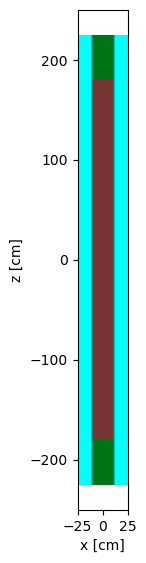

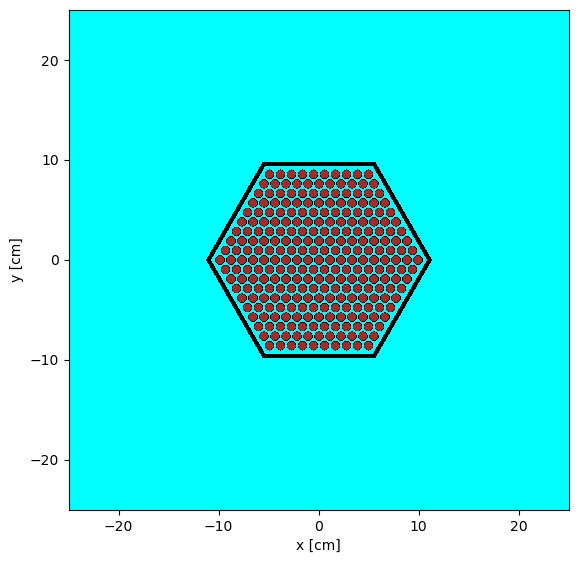

In [13]:
#fast fuel assembly 
infast_ass = openmc.HexLattice(name='fast fuel assembly')
infast_ass.center = (0,0)
infast_ass.pitch = (1.10,)
infast_ass.orientation = 'x'
infast_ass.outer = coolant_u

inring11=[fast_fuel_rod]*60
inring10=[fast_fuel_rod]*54
inring9= [fast_fuel_rod]*48
inring8= [fast_fuel_rod]*42
inring7= [fast_fuel_rod]*36
inring6= [fast_fuel_rod]*30
inring5= [fast_fuel_rod]*24
inring4= [fast_fuel_rod]*18
inring3= [fast_fuel_rod]*12
inring2= [fast_fuel_rod]*6
inring1= [fast_fuel_rod]
infast_ass.universes=[inring10,
                      inring9,
                      inring8,
                      inring7,
                      inring6,
                      inring5,
                      inring4,
                      inring3,
                      inring2,
                      inring1]

fast_lattice_boundary_in= openmc.model.hexagonal_prism(edge_length=10.8,orientation='x')
fast_lattice_boundary_out= openmc.model.hexagonal_prism(edge_length=11.3,orientation='x')

fast_wrapper_cell = openmc.Cell(cell_id=601,  fill=cladding_material, 
                    region= ~fast_lattice_boundary_in & fast_lattice_boundary_out & 
                    -core_top & +core_bottom)

infast_ass_cell = openmc.Cell(cell_id=600,  fill=infast_ass, 
                    region= fast_lattice_boundary_in & -core_top & +core_bottom)


infast_ass_surrounding = openmc.Cell(cell_id=602,fill=coolant1, 
                    region= ~fast_lattice_boundary_out  & -core_top & +core_bottom)

infast_ass_u= openmc.Universe(cells=[infast_ass_cell,infast_ass_surrounding,fast_wrapper_cell])

img1 = infast_ass_u.plot(origin = (0,0,0), pixels=(500, 500), width = (50,500), 
                         color_by = 'material',colors=mat_colors, basis='xz')
img2 = infast_ass_u.plot(origin = (0,0,0), pixels=(500, 500), width = (50,50), 
                         color_by = 'material',colors=mat_colors)

/home/nushaer/anaconda3/envs/openmc-env/lib/python3.11/site-packages/openmc/model/funcs.py:124: FutureWarning: The hexagonal_prism(...) function has been replaced by the HexagonalPrism(...) class. Future versions of OpenMC will not accept hexagonal_prism.
  warn("The hexagonal_prism(...) function has been replaced by the "


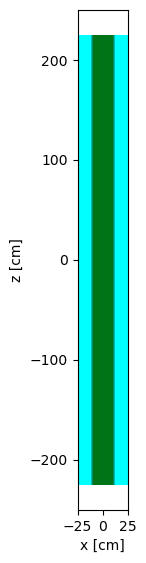

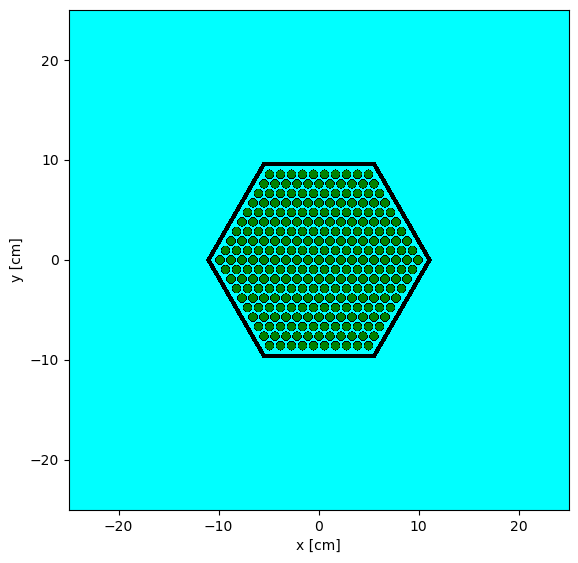

In [14]:
#breeder fuel assembly 
bfast_ass = openmc.HexLattice(name='fast fuel assembly')
bfast_ass.center = (0,0)
bfast_ass.pitch = (1.10,)
bfast_ass.orientation = 'x'
bfast_ass.outer = coolant_u

bring11=[MA_fuel_rod]*60
bring10=[MA_fuel_rod]*54
bring9= [MA_fuel_rod]*48
bring8= [MA_fuel_rod]*42
bring7= [MA_fuel_rod]*36
bring6= [MA_fuel_rod]*30
bring5= [MA_fuel_rod]*24
bring4= [MA_fuel_rod]*18
bring3= [MA_fuel_rod]*12
bring2= [MA_fuel_rod]*6
bring1= [MA_fuel_rod]
bfast_ass.universes=[bring10,
                      bring9,
                      bring8,
                      bring7,
                      bring6,
                      bring5,
                      bring4,
                      bring3,
                      bring2,
                      bring1]

b_lattice_boundary_in= openmc.model.hexagonal_prism(edge_length=10.8,orientation='x')
b_lattice_boundary_out= openmc.model.hexagonal_prism(edge_length=11.3,orientation='x')

b_wrapper_cell = openmc.Cell(cell_id=6001,  fill=cladding_material, 
                    region= ~b_lattice_boundary_in & b_lattice_boundary_out & 
                    -core_top & +core_bottom)

bfast_ass_cell = openmc.Cell(cell_id=6000,  fill=bfast_ass, 
                    region= b_lattice_boundary_in & -core_top & +core_bottom)


bfast_ass_surrounding = openmc.Cell(cell_id=6002,fill=coolant1, 
                    region= ~b_lattice_boundary_out  & -core_top & +core_bottom)

bfast_ass_u= openmc.Universe(cells=[bfast_ass_cell,bfast_ass_surrounding,b_wrapper_cell])

img1 = bfast_ass_u.plot(origin = (0,0,0), pixels=(500, 500), width = (50,500), 
                         color_by = 'material',colors=mat_colors, basis='xz')
img2 = bfast_ass_u.plot(origin = (0,0,0), pixels=(500, 500), width = (50,50), 
                         color_by = 'material',colors=mat_colors)

/home/nushaer/anaconda3/envs/openmc-env/lib/python3.11/site-packages/openmc/model/funcs.py:124: FutureWarning: The hexagonal_prism(...) function has been replaced by the HexagonalPrism(...) class. Future versions of OpenMC will not accept hexagonal_prism.
  warn("The hexagonal_prism(...) function has been replaced by the "


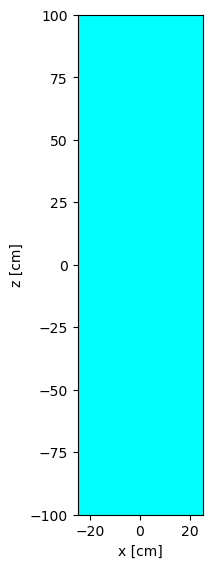

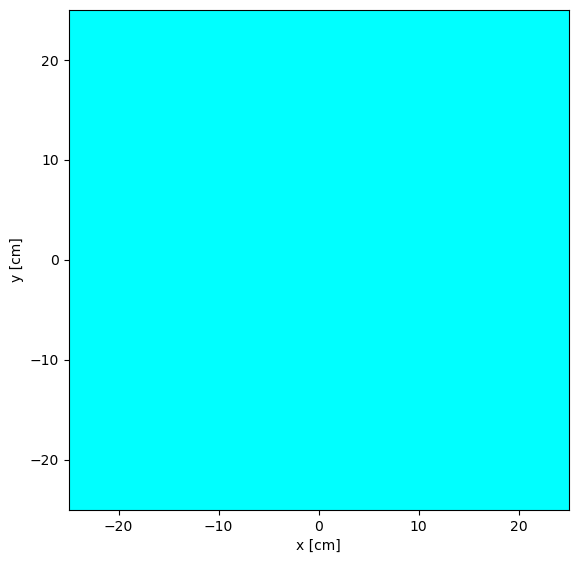

In [15]:
#fast region control rod assembly
fastcontrol_lat = openmc.HexLattice(name='fast control 2nd')
fastcontrol_lat.center = (0., 0.)
fastcontrol_lat.pitch = (4.0,)
fastcontrol_lat.orientation = 'x'
fastcontrol_lat.outer = coolant_u




fcring3= [control_rod]*12
fcring2= [control_rod]*6
fcring1= [control_rod]
fastcontrol_lat.universes=[fcring3,
                           fcring2,
                           fcring1]

f_control_lattice_boundary_in= openmc.model.hexagonal_prism(edge_length=10.8, orientation='x')
f_control_lattice_boundary_out= openmc.model.hexagonal_prism(edge_length=11.3,orientation='x')

f_control_wrapper_cell = openmc.Cell(cell_id=802,  fill=cladding_material, 
                    region= ~f_control_lattice_boundary_in & f_control_lattice_boundary_out & 
                    -core_top & +control_rod_bottom)

f_control_wrapper_cell_out = openmc.Cell(cell_id=803,  fill=coolant1, 
                    region= ~f_control_lattice_boundary_in & f_control_lattice_boundary_out & 
                    -control_rod_bottom & +core_bottom)


fastcontrol_cell = openmc.Cell(cell_id=800,fill=fastcontrol_lat, 
                    region= f_control_lattice_boundary_in & -core_top & +core_bottom)
fastcontrol_surrounding = openmc.Cell(cell_id=801,fill=coolant1, 
                    region= ~f_control_lattice_boundary_out & -core_top & +core_bottom)

fastcontrol_ass_u= openmc.Universe(cells=[fastcontrol_cell,fastcontrol_surrounding,
                                          f_control_wrapper_cell,f_control_wrapper_cell_out])

img1 = fastcontrol_ass_u.plot(origin = (0,0,0), pixels=(500, 500), width = (50,200), 
                          color_by = 'material',colors=mat_colors, basis='xz')
img2 = fastcontrol_ass_u.plot(origin = (0,0,0), pixels=(500, 500), width = (50,50), 
                          color_by = 'material',colors=mat_colors)

/home/nushaer/anaconda3/envs/openmc-env/lib/python3.11/site-packages/openmc/model/funcs.py:124: FutureWarning: The hexagonal_prism(...) function has been replaced by the HexagonalPrism(...) class. Future versions of OpenMC will not accept hexagonal_prism.
  warn("The hexagonal_prism(...) function has been replaced by the "


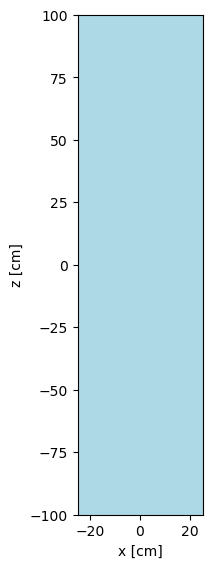

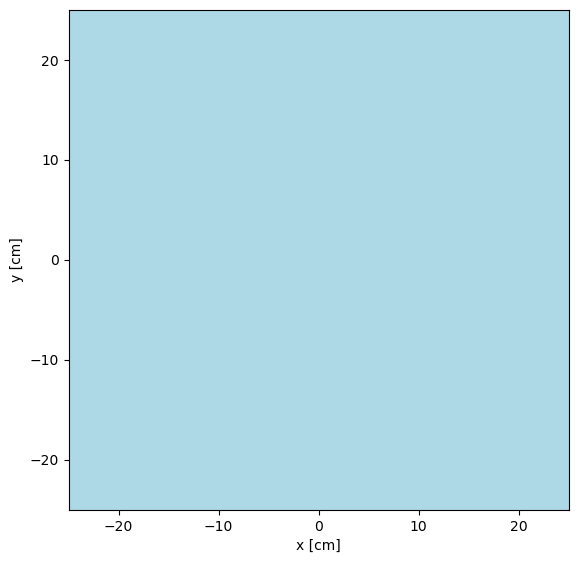

In [16]:
#thermal region control rod assembly
thermalcontrol_lat = openmc.HexLattice(name='thermal control assembly')
thermalcontrol_lat.center = (0., 0.)
thermalcontrol_lat.pitch = (4.0,)
thermalcontrol_lat.orientation = 'x'
thermalcontrol_lat.outer = mod_u




tcring3= [t_control_rod]*12
tcring2= [t_control_rod]*6
tcring1= [t_control_rod]

thermalcontrol_lat.universes=[tcring3,
                              tcring2,
                              tcring1]

t_control_lattice_boundary_in= openmc.model.hexagonal_prism(edge_length=10.8,orientation='x')
t_control_lattice_boundary_out= openmc.model.hexagonal_prism(edge_length=11.3,orientation='x')


t_control_wrapper_cell = openmc.Cell(cell_id=902,  fill=cladding_material, 
                            region= ~t_control_lattice_boundary_in & 
                            t_control_lattice_boundary_out & -core_top & +control_rod_bottom)

t_control_wrapper_cell_out = openmc.Cell(cell_id=903,  fill=coolant2, 
                    region= ~t_control_lattice_boundary_in & t_control_lattice_boundary_out & 
                    -control_rod_bottom & +core_bottom)

thermalcontrol_cell = openmc.Cell(cell_id=900,fill=thermalcontrol_lat, 
                            region= t_control_lattice_boundary_in & -core_top & +core_bottom)
thermalcontrol_surrounding = openmc.Cell(cell_id=901,fill=coolant2, 
                            region= ~t_control_lattice_boundary_out & -core_top & +core_bottom)

thermalcontrol_ass_u= openmc.Universe(cells=[thermalcontrol_cell,
                            thermalcontrol_surrounding,t_control_wrapper_cell,t_control_wrapper_cell_out])

img1 = thermalcontrol_ass_u.plot(origin = (0,0,0), pixels=(500, 500), width = (50,200), 
                          color_by = 'material',colors=mat_colors, basis='xz')
img2 = thermalcontrol_ass_u.plot(origin = (0,0,0), pixels=(500, 500), width = (50,50), 
                          color_by = 'material',colors=mat_colors)

/home/nushaer/anaconda3/envs/openmc-env/lib/python3.11/site-packages/openmc/model/funcs.py:124: FutureWarning: The hexagonal_prism(...) function has been replaced by the HexagonalPrism(...) class. Future versions of OpenMC will not accept hexagonal_prism.
  warn("The hexagonal_prism(...) function has been replaced by the "


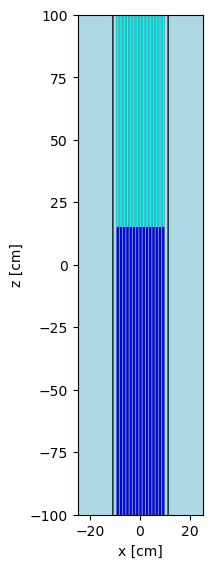

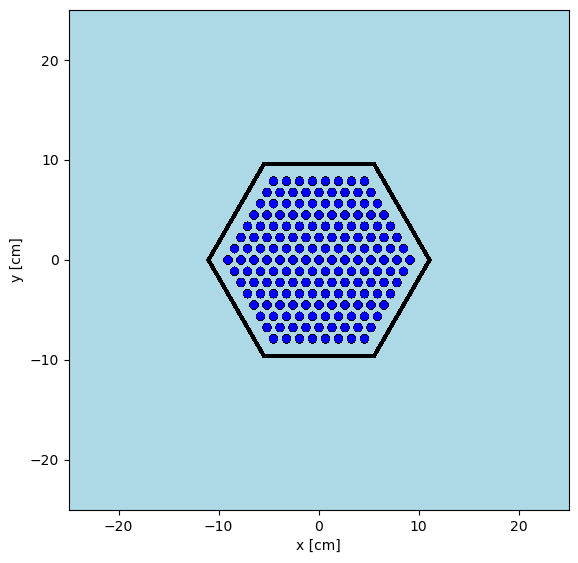

In [17]:
#thermal fuel assembly 
thermal_ass = openmc.HexLattice(name='thermal fuel assembly')
thermal_ass.center = (0,0)
thermal_ass.pitch = (1.3,)
thermal_ass.orientation = 'x'
thermal_ass.outer = mod_u


#thring10= [thermal_fuel_rod]*54
#thring9= [thermal_fuel_rod]*48
thring8= [thermal_fuel_rod]*42
thring7= [thermal_fuel_rod]*36
thring6= [thermal_fuel_rod]*30
thring5= [thermal_fuel_rod]*24
thring4= [thermal_fuel_rod]*18
thring3= [thermal_fuel_rod]*12
thring2= [thermal_fuel_rod]*6
thring1= [thermal_fuel_rod]
thermal_ass.universes=[thring8, 
                       thring7,
                       thring6,
                       thring5,
                       thring4,
                       thring3,
                       thring2,
                       thring1]


thermal_lattice_boundary_in= openmc.model.hexagonal_prism(edge_length=10.8,orientation='x')
thermal_lattice_boundary_out= openmc.model.hexagonal_prism(edge_length=11.3,orientation='x')

thermal_wrapper_cell = openmc.Cell(cell_id=1002,  fill=cladding_material, 
                        region= ~thermal_lattice_boundary_in & thermal_lattice_boundary_out &
                        -core_top & +core_bottom)




thermal_ass_cell = openmc.Cell(cell_id=1000,fill=thermal_ass, 
                        region= thermal_lattice_boundary_in & -core_top & +core_bottom)

thermal_ass_surrounding = openmc.Cell(cell_id=1001,fill=coolant2, 
                        region= ~thermal_lattice_boundary_out  & -core_top & +core_bottom)

thermal_ass_u= openmc.Universe(cells=[thermal_ass_cell,thermal_ass_surrounding,thermal_wrapper_cell])

img1 = thermal_ass_u.plot(origin = (0,0,0), pixels=(500, 500), width = (50,200), 
                         color_by = 'material',colors=mat_colors, basis='xz')
img2 = thermal_ass_u.plot(origin = (0,0,0), pixels=(500, 500), width = (50,50), 
                         color_by = 'material',colors=mat_colors)

In [18]:
# thermal and Fast Blank assembly

fast_blank_boundary_out= openmc.model.hexagonal_prism(edge_length=11.3)


fast_blank_cell = openmc.Cell(cell_id=1100,fill=coolant1, 
                        region= fast_blank_boundary_out & -core_top & +core_bottom)

fast_blank_cell_out = openmc.Cell(cell_id=1101,fill=coolant1, 
                     region= ~fast_blank_boundary_out & -core_top & +core_bottom)

fast_blank_u = openmc.Universe(cells=[fast_blank_cell,fast_blank_cell_out])
                       
shield_boundary_out= openmc.model.hexagonal_prism(edge_length=11.3)


shield_cell = openmc.Cell(cell_id=2100,fill=cladding_material, 
                        region= shield_boundary_out & -core_top & +core_bottom)

shield_cell_out = openmc.Cell(cell_id=2101,fill=cladding_material, 
                     region= ~shield_boundary_out & -core_top & +core_bottom)

shield_u = openmc.Universe(cells=[shield_cell,shield_cell_out])


thermal_blank_boundary_out= openmc.model.hexagonal_prism(edge_length=11.3)

thermal_blank_cell = openmc.Cell(cell_id=1200,fill=coolant2, 
                        region= thermal_blank_boundary_out & -core_top & +core_bottom)

thermal_blank_cell_out = openmc.Cell(cell_id=1201,fill=coolant2, 
                     region= ~thermal_blank_boundary_out  & -core_top & +core_bottom)

thermal_blank_u = openmc.Universe(cells=[thermal_blank_cell,thermal_blank_cell_out])



/home/nushaer/anaconda3/envs/openmc-env/lib/python3.11/site-packages/openmc/model/funcs.py:124: FutureWarning: The hexagonal_prism(...) function has been replaced by the HexagonalPrism(...) class. Future versions of OpenMC will not accept hexagonal_prism.
  warn("The hexagonal_prism(...) function has been replaced by the "


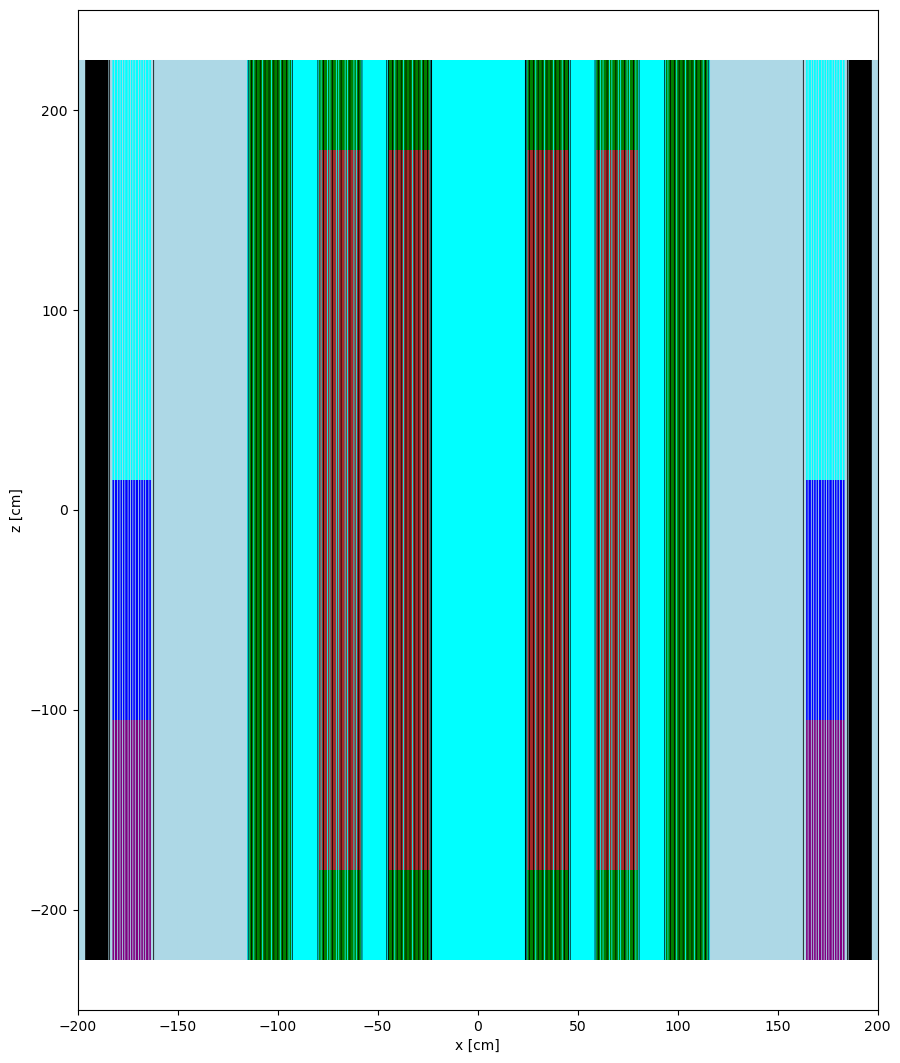

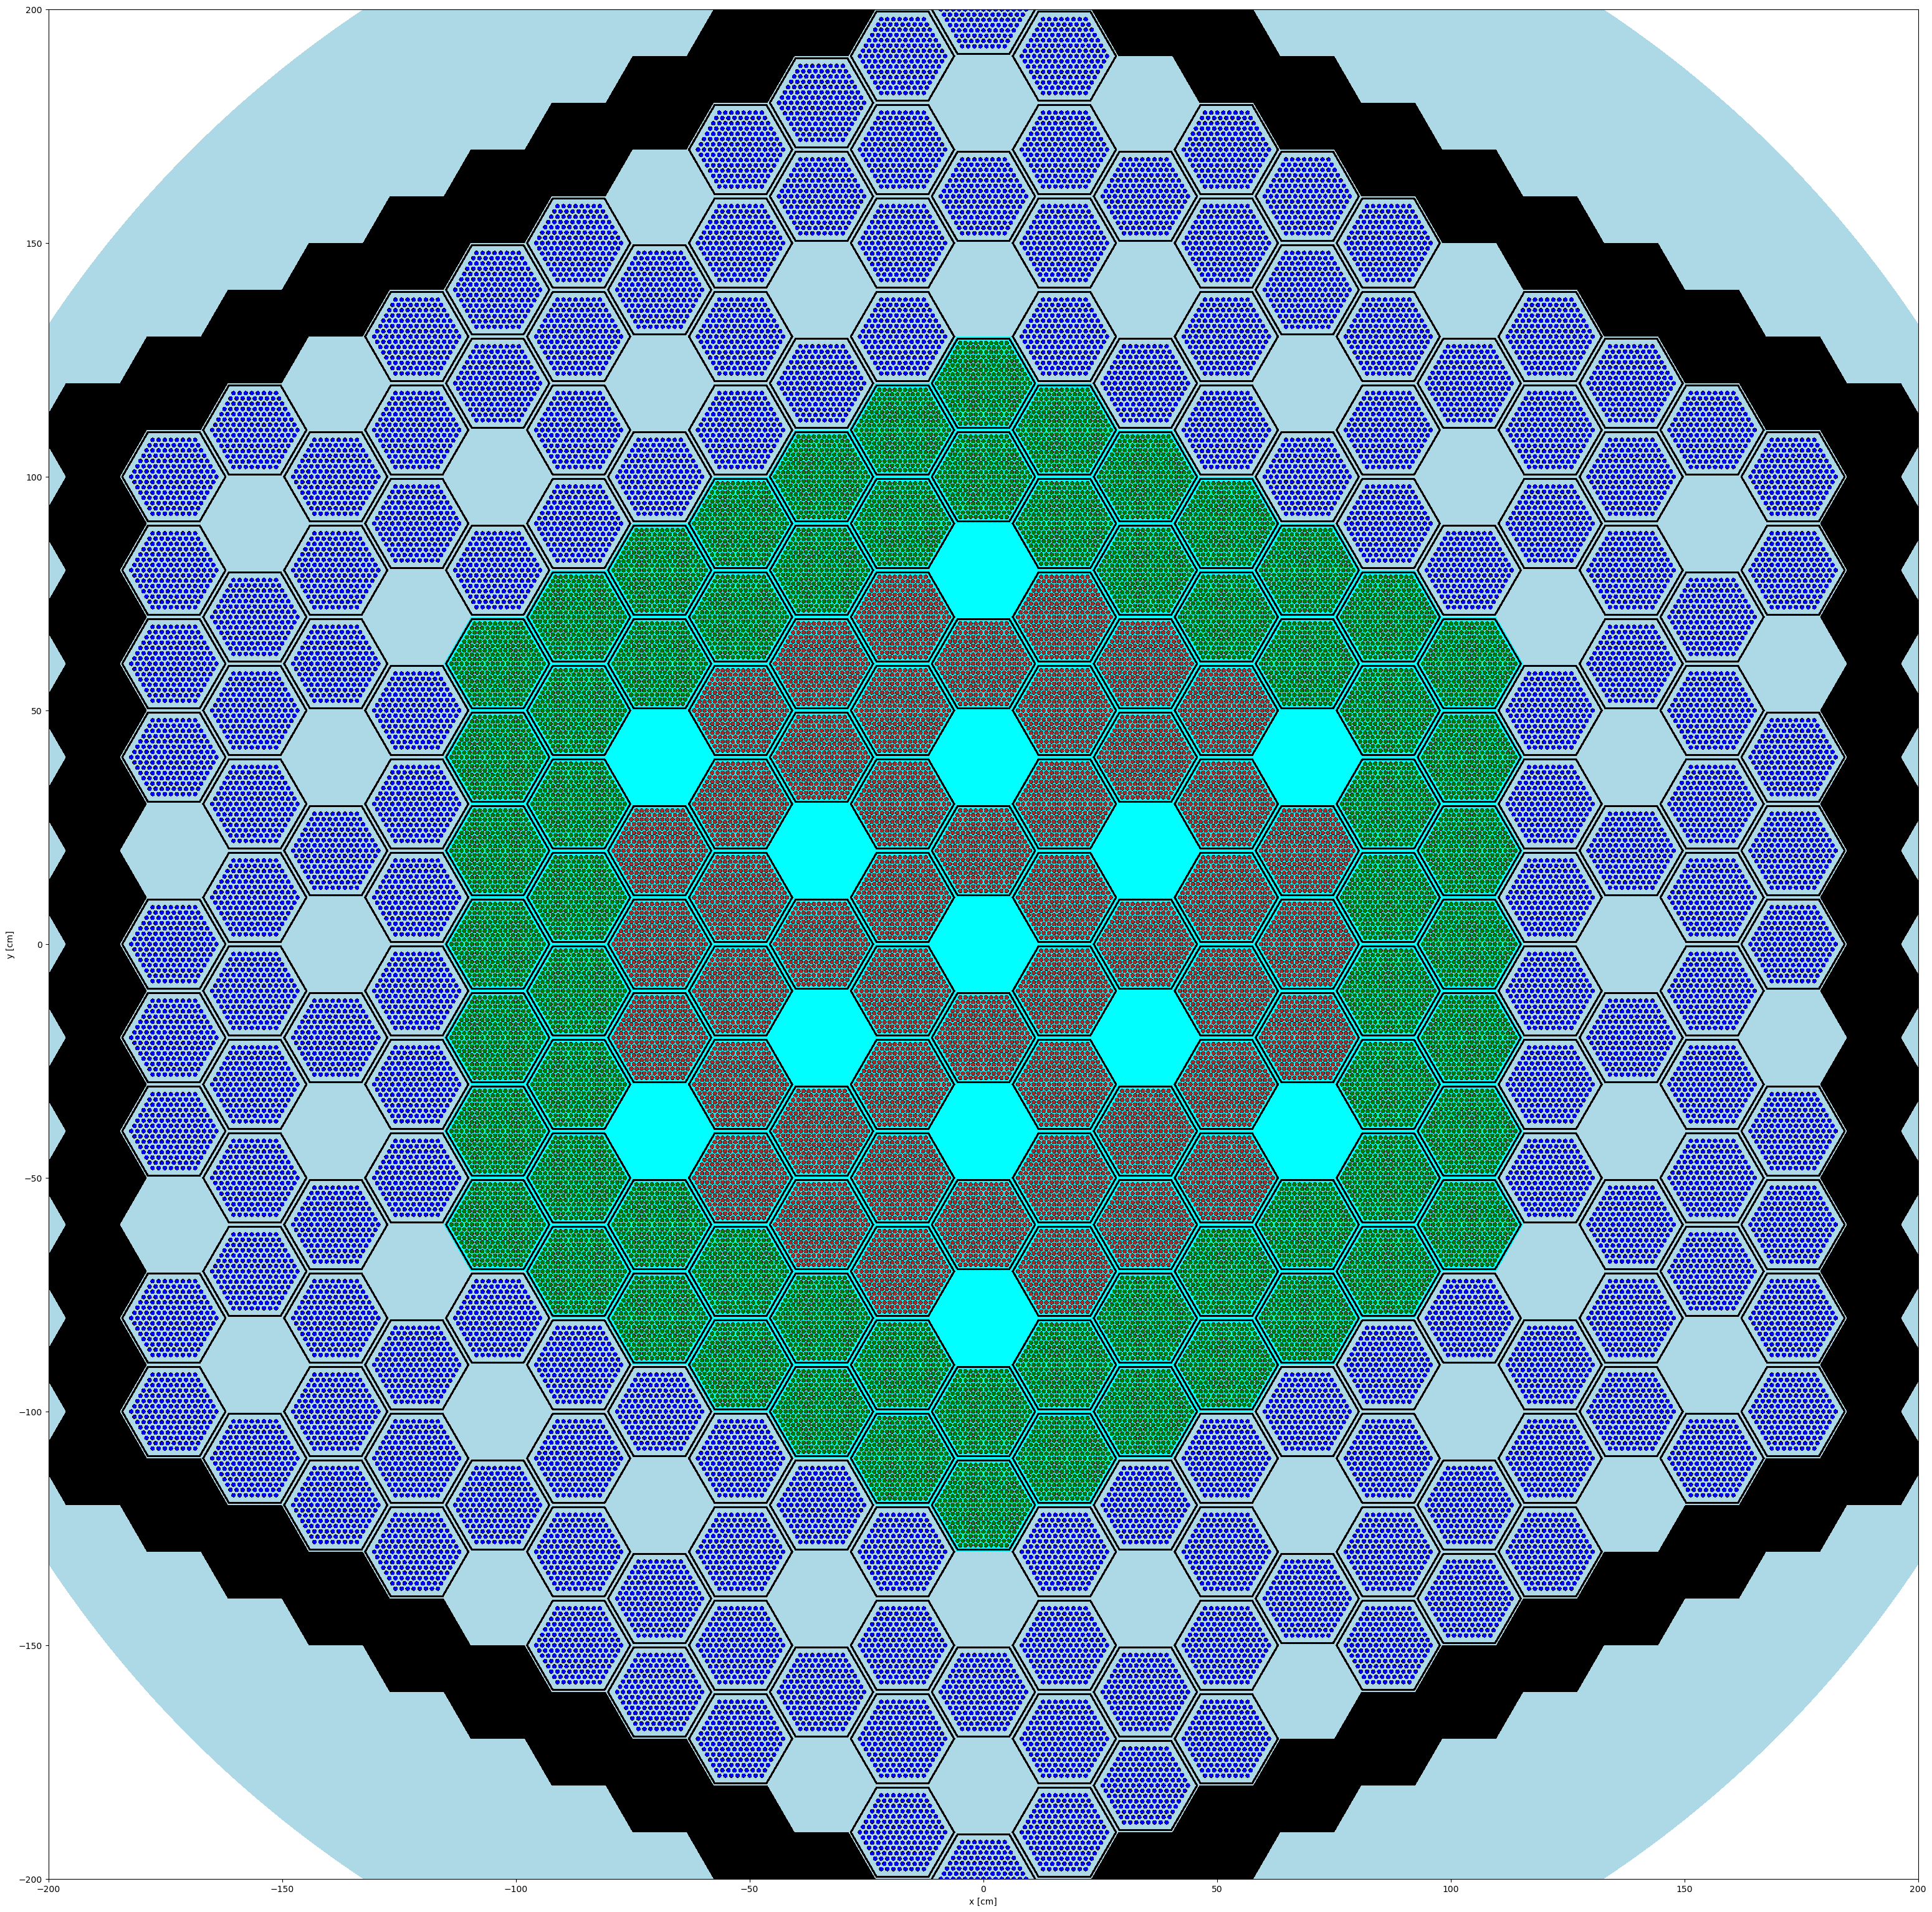

In [19]:
#fast core 
fastcore_lat = openmc.HexLattice(name='fast core')
fastcore_lat.center = (0., 0.)
fastcore_lat.pitch = (20,)
fastcore_lat.orientation = 'y'
fastcore_lat.outer = mod_u

fc12 = [shield_u]*66
fc11 = ([thermal_ass_u]*2 + [thermalcontrol_ass_u]
         +[thermal_ass_u]*3 + [thermalcontrol_ass_u]+[thermal_ass_u]*3)*6 
fc10 = ([thermalcontrol_ass_u] + [thermal_ass_u]*8)*6
fc9 = ([thermal_ass_u]*2 + ([thermalcontrol_ass_u] +[thermal_ass_u])*3)*6
fc8 = ([thermalcontrol_ass_u]+[thermal_ass_u]*6)*6
fc7 = [bfast_ass_u]*36
fc6 = [bfast_ass_u]*30
fc5 = ([fastcontrol_ass_u]+[infast_ass_u]*3)*6
fc4 = [infast_ass_u]*18
fc3 = ([fastcontrol_ass_u]+[infast_ass_u])*6
fc2 = [infast_ass_u]*6
fc1 = [fast_blank_u]*1
fastcore_lat.universes = [fc12,
                          fc11,
                          fc10,
                          fc9,
                          fc8,
                          fc7,
                          fc6,
                          fc5,
                          fc4,
                          fc3,
                          fc2,
                          fc1]

fastcore_boundary = openmc.ZCylinder(surface_id = 80000, r=240, boundary_type = 'reflective')

fastcore = openmc.Cell(cell_id=1300,fill=fastcore_lat, region=-fastcore_boundary & -core_top & +core_bottom)

fastcore_out = openmc.Cell(cell_id=1301,region=+fastcore_boundary & -core_top & +core_bottom)

core_u = openmc.Universe(cells=[fastcore, fastcore_out]) 

img1 = core_u.plot(origin = (0,0,0), pixels=(1000, 1000), width = (400,500),
                         color_by = 'material',colors=mat_colors, basis='xz')
img2 = core_u.plot(origin = (0,0,0), pixels=(3000, 3000), width = (400,400), 
                         color_by = 'material',colors=mat_colors)

fc11 = [thermal_blank_u]*60
fc10 = ([thermalcontrol_ass_u] + [thermal_ass_u]*8)*6
fc9 = ([thermal_ass_u]*2 + ([thermalcontrol_ass_u] +[thermal_ass_u])*3)*6
fc8 = ([thermalcontrol_ass_u]+[thermal_ass_u]*6)*6
fc7 = [fast_blank_u]*36
fc6 = [infast_ass_u]*30
fc5 = ([fastcontrol_ass_u]+[infast_ass_u]*3)*6

fc4 = [infast_ass_u]*18
fc3 = ([infast_ass_u]+[infast_ass_u]*3)*3
fc2 = [infast_ass_u]*6
fc1 = [fast_blank_u]*1

In [20]:
geom = openmc.Geometry(core_u)
geom.export_to_xml()

In [21]:
lower_left1 = [-220, -220, -225]
upper_right1 = [220, 220, 225]
uniform_dist1 = openmc.stats.Box(lower_left1, upper_right1)
src1 = openmc.IndependentSource(space=uniform_dist1)

lower_left2 = [-10, -10, -10]
upper_right2 = [10, 10, 10]
uniform_dist2 = openmc.stats.Box(lower_left2, upper_right2)
src2 = openmc.IndependentSource(space=uniform_dist2)



settings = openmc.Settings()
settings.source = src1
settings.batches = 100
settings.generations_per_batch = 3
settings.inactive = 20
settings.particles = 20000
#settings.create_delayed_neutrons = False
settings.export_to_xml()

In [22]:
energies = np.logspace(np.log10(1e-5), np.log10(20.0e6), 501)

e_filter = openmc.EnergyFilter(energies)

tally = openmc.Tally(tally_id=1)   
tally.filters = [e_filter]  
tally.scores = ['flux']

tallies = openmc.Tallies()
tallies.append(tally, merge=True)
tallies.export_to_xml()


In [23]:
#openmc.run()

In [24]:
#volume calculations 

tmox.volume = math.pi * 0.41**2 * 360 * 271 * 48
seed_fuel.volume = (math.pi * 0.41**2 * 90 * 271 * 48) + (math.pi * 0.41**2 * 450 * 271 * 66)

uranium_70.volume = math.pi * 0.41**2 * 120 * 169 * 162
uranium_60.volume = math.pi * 0.41**2 * 120 * 169 * 162
uranium_50.volume = math.pi * 0.41**2 * 210 * 169 * 162

tmox_with_MA.volume = tmox.volume
seed_with_MA.volume = seed_fuel.volume

uranium_70_with_MA.volume = uranium_70.volume
uranium_60_with_MA.volume = uranium_60.volume
uranium_50_with_MA.volume = uranium_50.volume

uranium_70_BA.volume = uranium_70.volume
uranium_60_BA.volume = uranium_60.volume
uranium_50_BA.volume = uranium_50.volume

MA_fuel.volume = math.pi * 0.41**2 * 450 * 37 * 84      #for MA rod in fast zone with dep U 
#tmox_with_MA.volume = math.pi * 0.41**2 * 200 * 234 * 84 + math.pi * 0.41**2 * 450 * 37 * 84  #for fixed rod with MA in TMOX 

In [25]:
chain = openmc.deplete.Chain.from_xml("/home/nushaer/Desktop/meh/endfb-viii.0-hdf5/chain_casl_sfr.xml")
model = openmc.Model(geometry=geom, settings=settings)
operator = openmc.deplete.CoupledOperator(model, "/home/nushaer/Desktop/meh/endfb-viii.0-hdf5/chain_casl_sfr.xml")

power = 2400 * 1e6

time_steps = [30] * 12
integrator = openmc.deplete.PredictorIntegrator(operator, time_steps, power, timestep_units='d')

In [26]:
integrator.integrate()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

 Reading Nb95 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Nb95.h5
 Reading Mo99 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Mo99.h5
 Reading Tc99 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Tc99.h5
 Reading Ru100 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Ru100.h5
 Reading Ru101 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Ru101.h5
 Reading Ru102 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Ru102.h5
 Reading Ru103 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Ru103.h5
 Reading Ru104 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Ru104.h5
 Reading Ru105 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Ru105.h5
 Reading Ru106 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Ru106.h5
 Reading Rh103 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Rh103.h5
 Reading Rh104 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Rh104.h5
 Reading Rh105 from /home/nushaer/

 Reading I135 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/I135.h5
 Reading Xe128 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Xe128.h5
 Reading Xe130 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Xe130.h5
 Reading Xe131 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Xe131.h5
 Reading Xe132 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Xe132.h5
 Reading Xe133 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Xe133.h5
 Reading Xe134 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Xe134.h5
 Reading Xe135 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Xe135.h5
 Reading Xe136 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Xe136.h5


          2500K


 Reading Cs133 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Cs133.h5
 Reading Cs134 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Cs134.h5
 Reading Cs135 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Cs135.h5
 Reading Cs136 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Cs136.h5
 Reading Cs137 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Cs137.h5
 Reading Ba134 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Ba134.h5
 Reading Ba137 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Ba137.h5


          1200K
          2500K


 Reading Ba140 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Ba140.h5
 Reading La139 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/La139.h5
 Reading La140 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/La140.h5
 Reading Ce140 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Ce140.h5
 Reading Ce141 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Ce141.h5
 Reading Ce142 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Ce142.h5
 Reading Ce143 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Ce143.h5
 Reading Ce144 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Ce144.h5
 Reading Pr141 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Pr141.h5
 Reading Pr142 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Pr142.h5
 Reading Pr143 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Pr143.h5
 Reading Nd142 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Nd142.h5
 Reading Nd143 from /home/nu

          1200K
          2500K


 Reading Gd152 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Gd152.h5
 Reading Gd154 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Gd154.h5
 Reading Gd155 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Gd155.h5
 Reading Gd156 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Gd156.h5
 Reading Gd157 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Gd157.h5
 Reading Gd158 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Gd158.h5
 Reading Gd159 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Gd159.h5
 Reading Gd160 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Gd160.h5
 Reading Tb159 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Tb159.h5
 Reading Tb160 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Tb160.h5
 Reading Tb161 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Tb161.h5
 Reading Dy160 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Dy160.h5
 Reading Dy161 from /home/nu

          1200K
          2500K


 Reading Ta182 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Ta182.h5
 Reading Th230 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Th230.h5
 Reading Th231 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Th231.h5
 Reading Th233 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Th233.h5
 Reading Th234 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Th234.h5
 Reading Pa231 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Pa231.h5
 Reading Pa232 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Pa232.h5
 Reading Pa233 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/Pa233.h5
 Reading U232 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/U232.h5
 Reading U233 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/U233.h5
 Reading U237 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/U237.h5
 Reading U239 from /home/nushaer/Desktop/meh/endfb-viii.0-hdf5/neutron/U239.h5
 Reading Np236 from /home/nushaer/De

In [27]:
results = openmc.deplete.Results("./depletion_results.h5")

time, k = results.get_keff()

time /= (24 * 60 * 60)  # convert back to days from seconds

k

array([[1.11382100e+00, 4.11494856e-04],
       [1.05458632e+00, 4.27633716e-04],
       [1.04812435e+00, 4.97160693e-04],
       [1.04451021e+00, 3.63046925e-04],
       [1.03908899e+00, 3.85720278e-04],
       [1.03739033e+00, 4.28749998e-04],
       [1.03302544e+00, 4.08866629e-04],
       [1.03118936e+00, 4.04892740e-04],
       [1.02788296e+00, 3.89599887e-04],
       [1.02446095e+00, 4.54689806e-04],
       [1.02161286e+00, 4.33684905e-04],
       [1.01906704e+00, 4.38580804e-04],
       [1.01542004e+00, 4.10878511e-04]])

In [28]:
k_inf = k[:, 0]

k_inf= np.array(k_inf).reshape((-1, 1))
k_inf = k_inf.flatten()
print(k_inf)

[1.113821   1.05458632 1.04812435 1.04451021 1.03908899 1.03739033
 1.03302544 1.03118936 1.02788296 1.02446095 1.02161286 1.01906704
 1.01542004]


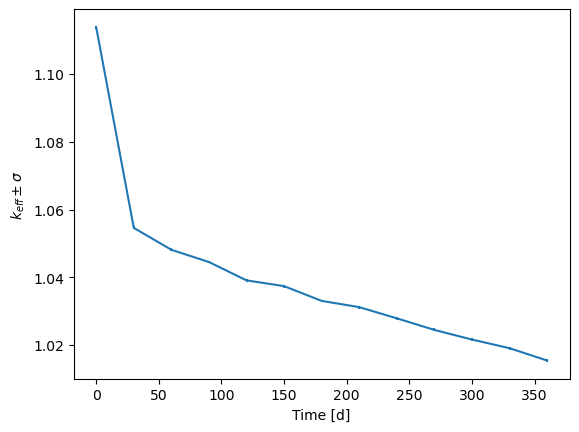

In [29]:
plt.errorbar(time, k[:, 0], yerr=k[:, 1])
plt.xlabel("Time [d]")
plt.ylabel("$k_{eff}\pm \sigma$");

In [30]:
results

[<StepResult: t=0.0, dt=2592000.0, source=2400000000.0>,
 <StepResult: t=2592000.0, dt=2592000.0, source=2400000000.0>,
 <StepResult: t=5184000.0, dt=2592000.0, source=2400000000.0>,
 <StepResult: t=7776000.0, dt=2592000.0, source=2400000000.0>,
 <StepResult: t=10368000.0, dt=2592000.0, source=2400000000.0>,
 <StepResult: t=12960000.0, dt=2592000.0, source=2400000000.0>,
 <StepResult: t=15552000.0, dt=2592000.0, source=2400000000.0>,
 <StepResult: t=18144000.0, dt=2592000.0, source=2400000000.0>,
 <StepResult: t=20736000.0, dt=2592000.0, source=2400000000.0>,
 <StepResult: t=23328000.0, dt=2592000.0, source=2400000000.0>,
 <StepResult: t=25920000.0, dt=2592000.0, source=2400000000.0>,
 <StepResult: t=28512000.0, dt=2592000.0, source=2400000000.0>,
 <StepResult: t=31104000.0, dt=0.0, source=2400000000.0>]

In [31]:
materials

[Material
 	ID             =	1
 	Name           =	Mixed oxide
 	Temperature    =	900
 	Density        =	10.0 [g/cc]
 	Volume         =	2473037.0062885154 [cm^3]
 	Depletable     =	True
 	S(a,b) Tables  
 	Nuclides       
 	O16            =	0.1176       [wo]
 	Th232          =	0.23         [wo]
 	U235           =	0.0018       [wo]
 	U238           =	0.4728       [wo]
 	Pu238          =	0.0053       [wo]
 	Pu239          =	0.1          [wo]
 	Pu240          =	0.0445       [wo]
 	Pu241          =	0.0124       [wo]
 	Pu242          =	0.0156       [wo],
 Material
 	ID             =	2
 	Name           =	Seed or breeder
 	Temperature    =	900
 	Density        =	10.0 [g/cc]
 	Volume         =	4868791.606130514 [cm^3]
 	Depletable     =	True
 	S(a,b) Tables  
 	Nuclides       
 	O16            =	1.9952412    [ao]
 	U234           =	2.7156394766000768e-05 [ao]
 	U235           =	0.003038259908592467 [ao]
 	U236           =	1.3916689706208231e-05 [ao]
 	U238           =	0.9969206670069353 [ao]
 	

In [33]:
#tmox = openmc.Material(material_id=1, name='Mixed oxide')
#tmox.add_nuclide('U235', 0.0018, 'wo')
#tmox.add_nuclide('U238', 0.4728, 'wo')
#tmox.add_nuclide('Th232', 0.23, 'wo')
#tmox.add_nuclide('Pu238', 0.0053, 'wo')
#tmox.add_nuclide('Pu239', 0.1, 'wo')
#tmox.add_nuclide('Pu240', 0.0445, 'wo')
#tmox.add_nuclide('Pu241', 0.0124, 'wo')
#tmox.add_nuclide('Pu242', 0.0156, 'wo')
#tmox.add_nuclide('O16', 0.1176, 'wo')
#tmox.set_density('g/cc',10.0)
#tmox.temperature = fuel_temp


_, u233 = results.get_atoms("1","U233")
_, u235 = results.get_atoms("1","U235")
_, u238 = results.get_atoms("1", "U238")
_, pu238 = results.get_atoms("1","Pu238")
_, pu239 = results.get_atoms("1","Pu239")
_, pu240 = results.get_atoms("1","Pu240")
_, pu241 = results.get_atoms("1","Pu241")
_, pu242 = results.get_atoms("1","Pu242")
_, np237 = results.get_atoms("1","Np237")
_, xe135 = results.get_atoms("1", "Xe135")
_, th232 = results.get_atoms("1", "Th232")





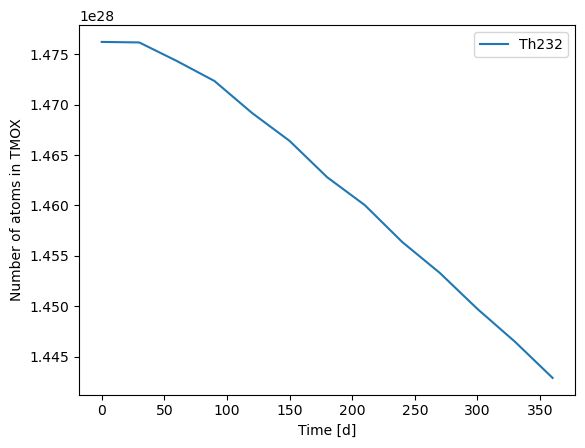

In [41]:
#plt.plot(time, u233, label="U233")
#plt.plot(time, u235, label="U235")
#plt.plot(time, u238, label="U238")
#plt.plot(time, pu238, label="Pu238")
#plt.plot(time, pu239, label="Pu239")
#plt.plot(time, pu240, label="Pu240")
#plt.plot(time, pu241, label="Pu241")
#plt.plot(time, pu242, label="Pu242")
#plt.plot(time, np237, label="Np237")
#plt.plot(time, xe135, label="Xe135")
plt.plot(time, th232, label="Th232")


plt.xlabel("Time [d]")
plt.ylabel("Number of atoms in TMOX");
plt.legend()

In [ ]:
_, u235_fiss_tmox = results.get_reaction_rate("12","U235","fission")
_, u235_fiss_seed = results.get_reaction_rate("13","U235","fission")
_, u235_fiss_u60 = results.get_reaction_rate("14","U235","fission")
_, u235_fiss_u70 = results.get_reaction_rate("15","U235","fission")

_, u233_fiss_tmox = results.get_reaction_rate("12","U233","fission")
_, u233_fiss_seed = results.get_reaction_rate("13","U233","fission")
_, u233_fiss_u60 = results.get_reaction_rate("14","U233","fission")
_, u233_fiss_u70 = results.get_reaction_rate("15","U233","fission")

_, pu239_fiss_tmox = results.get_reaction_rate("12","Pu239","fission")
_, pu239_fiss_seed = results.get_reaction_rate("13","Pu239","fission")
_, pu239_fiss_u60 = results.get_reaction_rate("14","Pu239","fission")
_, pu239_fiss_u70 = results.get_reaction_rate("15","Pu239","fission")

_, pu241_fiss_tmox = results.get_reaction_rate("12","Pu241","fission")
_, pu241_fiss_seed = results.get_reaction_rate("13","Pu241","fission")
_, pu241_fiss_u60 = results.get_reaction_rate("14","Pu241","fission")
_, pu241_fiss_u70 = results.get_reaction_rate("15","Pu241","fission")


KeyError: '14'

In [ ]:
total_fiss = ( u235_fiss_seed +  
            u233_fiss_seed+ 
            pu239_fiss_seed+
            pu241_fiss_seed)

In [ ]:
_,u2 = results.get_reaction_rate("12","U238","fission")

In [ ]:
sp = openmc.StatePoint('statepoint.100.h5')

In [ ]:
t = sp.tallies[tally.id]
flux = t.mean.ravel()         
flux_unc = t.std_dev.ravel()

KeyError: 1

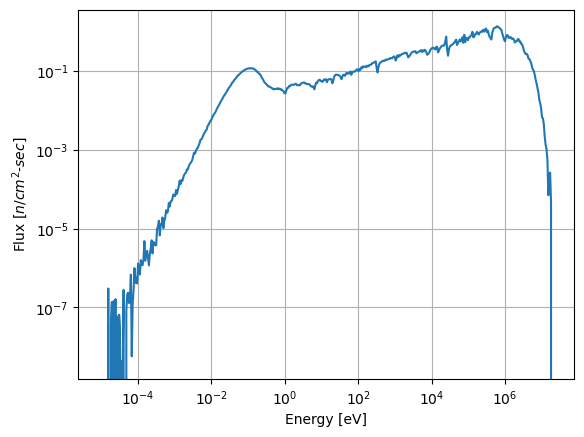

In [ ]:
plt.loglog(energies[:-1], flux, label = 'Flux')
plt.grid()
plt.xlabel('Energy [eV]')
plt.ylabel('Flux [$n/cm^2$-$sec$]')
plt.savefig('vver+BA flux.png', format='png', dpi=1200) # Dots per inches (dpi) determines how many pixels the figure comprises. The default dpi in matplotlib is 100.


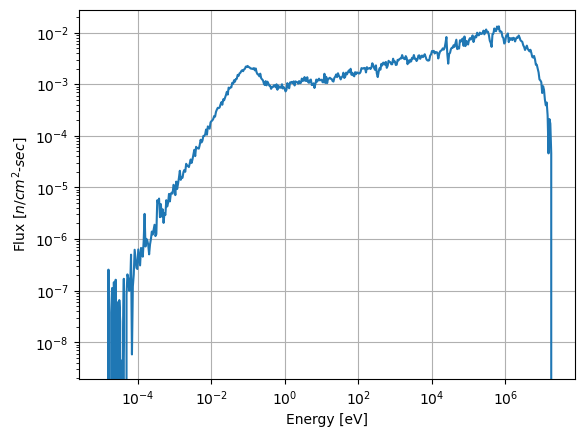

In [ ]:
plt.loglog(energies[:-1], flux_unc)
plt.grid()
plt.xlabel('Energy [eV]')
plt.ylabel('Flux [$n/cm^2$-$sec$]')
plt.savefig('vver+BA flux_unc.png', format='png', dpi=2400)

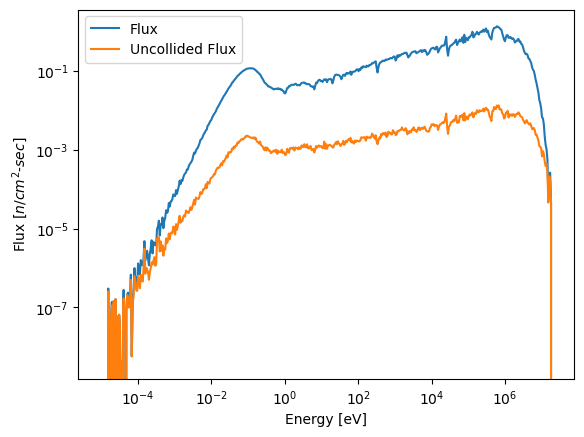

In [ ]:
plt.loglog(energies[:-1], flux, label = 'Flux')
plt.grid()
plt.xlabel('Energy [eV]')
plt.ylabel('Flux [$n/cm^2$-$sec$]')
plt.savefig('vver+BA flux.png', format='png', dpi=1200) 

plt.loglog(energies[:-1], flux_unc, label = 'Uncollided Flux')
plt.grid()
plt.xlabel('Energy [eV]')
plt.ylabel('Flux [$n/cm^2$-$sec$]')
plt.savefig('vver+BA flux_unc.png', format='png', dpi=2400)

plt.legend()